1. Package import

In [46]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

2. make array and initilize value

In [47]:
datanum= 300

epoch = 200000

# array for graph
train_loss_Array=np.zeros((epoch,1))
test_loss_Array=np.zeros((epoch,1))

W3_Array=np.zeros((epoch,1))
W2_Array=np.zeros((epoch,1))
W1_Array=np.zeros((epoch,1))
W0_Array=np.zeros((epoch,1))

x_epoch=np.arange(epoch)

# dot for gradient decent
train_X_x =np.zeros((datanum,1))
train_X_y =np.zeros((datanum,1))
train_X_z =np.zeros((datanum,1))
train_Y =np.zeros((datanum,1))

test_X_x =np.zeros((datanum,1))
test_X_y =np.zeros((datanum,1))
test_X_z =np.zeros((datanum,1))
test_Y =np.zeros((datanum,1))




3. read train and test data

In [48]:
import csv

with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 0 
    for i in reader:
        train_X_x[ct]=i[0]
        train_X_y[ct]=i[1]
        train_X_z[ct]=i[2]
        train_Y[ct]=i[3]
        ct += 1

with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 0 
    for i in reader:
        test_X_x[ct]=i[0]
        test_X_y[ct]=i[1]
        test_X_z[ct]=i[2]
        test_Y[ct]=i[3]
        ct += 1
        

4. Processing Gradient decent(training)

In [49]:
lr=0.0000005 #learning Rate

W3=np.random.randn(1)*0.1
W2=np.random.randn(1)*0.1
W1=np.random.randn(1)*0.1
W0=np.random.randn(1)*0.1

W3_=np.zeros(1)
W2_=np.zeros(1)
W1_=np.zeros(1)
W0_=np.zeros(1)

for iter in range(epoch):
    
    
    #calculate the train loss
    value= W0+W1*train_X_x+W2*train_X_y+W3*train_X_z-train_Y
    loss=(value)*(value) 
    loss=1/(2*datanum)*np.sum(loss)
    train_loss_Array[iter]=loss
    
#     print("train")
#     print(loss)
    
    #calculate the train loss
    value= W0+W1*test_X_x+W2*test_X_y+W3*test_X_z-test_Y
    loss=(value)*(value) 
    loss=1/(2*datanum)*np.sum(loss)
    test_loss_Array[iter]=loss
    
#     print("test")
#     print(loss)

    value= W0+W1*train_X_x+W2*train_X_y+W3*train_X_z-train_Y
    W0_ = 1/datanum*np.sum(value)
    W1_ = 1/datanum*np.sum(value*train_X_x)
    W2_ = 1/datanum*np.sum(value*train_X_y)
    W3_ = 1/datanum*np.sum(value*train_X_z)

#     print(W_)
#     print(W)
    # update the parameters
    W0 = W0 - W0_ * lr
    W1 = W1 - W1_ * lr
    W2 = W2 - W2_ * lr
    W3 = W3 - W3_ * lr
    
    W0_Array[iter] = W0
    W1_Array[iter] = W1
    W2_Array[iter] = W2
    W3_Array[iter] = W3
 

5. plotting the input data

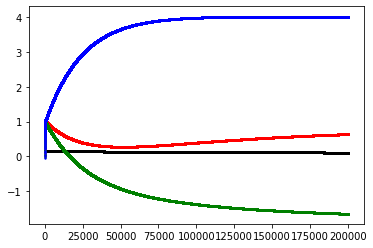

In [50]:
plt.scatter(x_epoch,W0_Array,c="black",s=2)
plt.scatter(x_epoch,W1_Array,c="red",s=2)
plt.scatter(x_epoch,W2_Array,c="green",s=2)
plt.scatter(x_epoch,W3_Array,c="blue",s=2)

plt.show()

6. plotting the output results

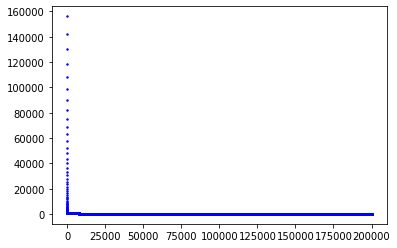

In [51]:
plt.scatter(x_epoch,train_loss_Array,c="b",s=2)
plt.show()

7. plotting the energy values

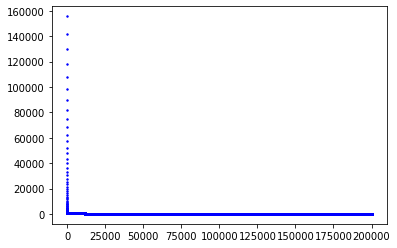

In [52]:
plt.scatter(x_epoch,test_loss_Array,c="b",s=2)
plt.show()